### Load required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import regularizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
df = pd.read_csv('./data/creditcard.csv', index_col=0)
print(df.shape)
df.head()

(284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data check

In [3]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [5]:
df.isnull().values.any()

False

In [6]:
df = df.drop(['Amount'], axis=1)

### Train/test split

In [7]:
frauds = df[df.Class == 1]
#normal = df[df.Class == 0].sample(10000)
normal = df[df.Class == 0]
print("Frauds shape: {}".format(frauds.shape))
print("Normal shape: {}".format(normal.shape))

Frauds shape: (492, 29)
Normal shape: (284315, 29)


In [8]:
data = pd.concat([frauds, normal])
data.shape

(284807, 29)

In [9]:
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

X_test, y_test = X_test.drop(['Class'], axis=1).values, X_test['Class'].values

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (199013, 28)
X_test shape: (85443, 28)


### Visualize the data with TSNE and PCA

In [10]:
x1 = df[df.Class == 1]
x2 = df[df.Class == 0].sample(10000)

dfd = x1.append(x2)
x = dfd.drop(['Class'], axis=1)
y = dfd['Class'].values

SEED = 42

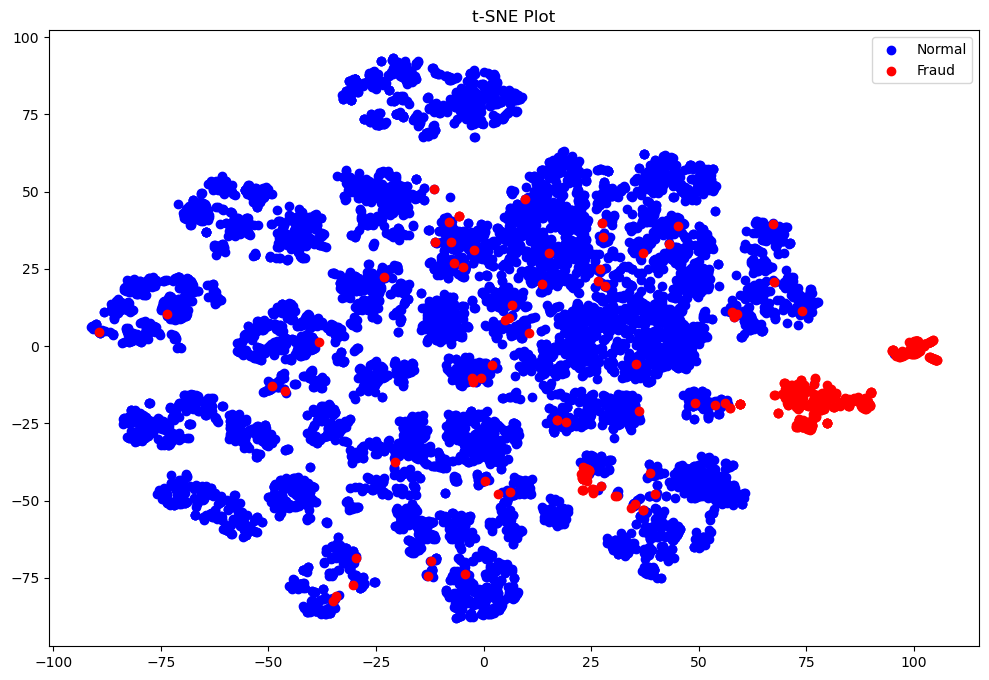

In [11]:
tsne = TSNE(n_components=2, random_state=SEED).fit_transform(x)
plt.figure(figsize=(12,8));
plt.scatter(tsne[np.where(y==0), 0], y=tsne[np.where(y==0), 1], color="blue", label='Normal')
plt.scatter(x=tsne[np.where(y==1), 0], y=tsne[np.where(y==1), 1], color="red", label='Fraud')
plt.title('t-SNE Plot')
plt.legend()
plt.show()

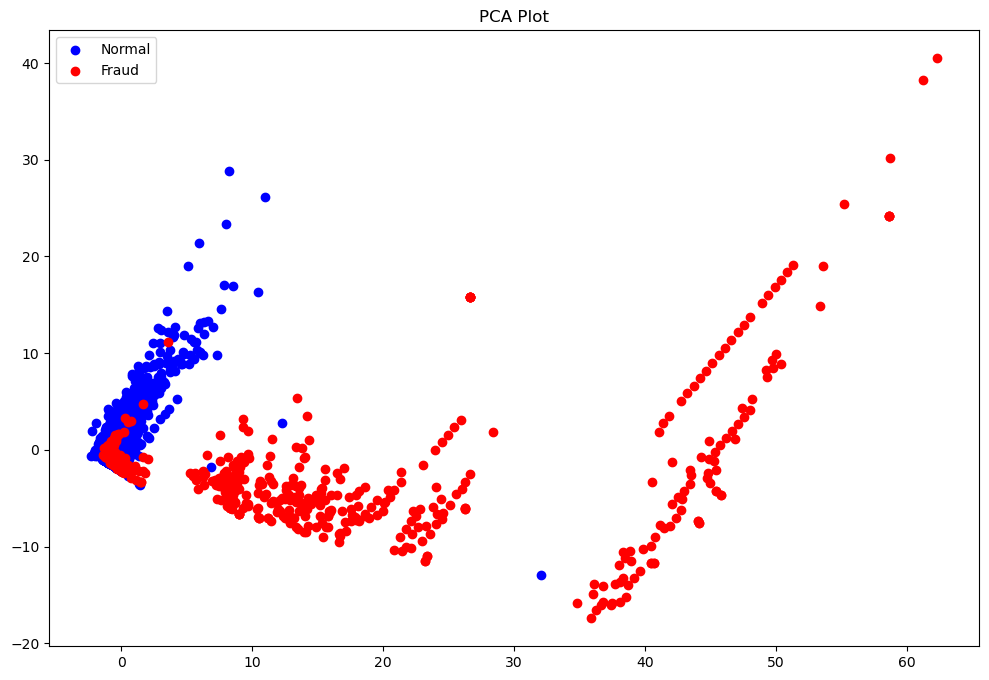

In [12]:
pca = PCA(n_components=2, random_state=SEED).fit_transform(x)
plt.figure(figsize=(12,8));
plt.scatter(pca[np.where(y==0), 0], y=pca[np.where(y==0), 1], color="blue", label='Normal')
plt.scatter(x=pca[np.where(y==1), 0], y=pca[np.where(y==1), 1], color="red", label='Fraud')
plt.title('PCA Plot')
plt.legend()
plt.show()

#### Normalize the data

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit_transform(X_train);
scaler.transform(X_test);

#### Add Noise in data

In [15]:
noise_factor = 0.5;
X_train_noise = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [16]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Time,,,,,,,,,,,,,,,,,,,,,
1597.0,-0.447016,0.865305,1.317656,-0.031990,-0.049573,-0.348205,0.401046,0.327438,-0.328063,-0.324674,...,-0.222342,-0.051299,-0.195072,-0.612429,0.064959,0.109621,-0.366456,0.079036,0.242154,0.082075
153690.0,-0.776571,0.804383,0.849559,-0.617220,-0.054136,0.523930,-0.307065,0.847935,0.278560,-0.668078,...,0.459711,-0.072367,0.354584,1.058180,-0.304391,0.268749,0.006518,-0.070282,0.284993,0.138072
97031.0,2.053647,0.243291,-1.872014,0.596880,0.570019,-1.064779,0.229696,-0.460595,1.865564,-0.865344,...,-0.386951,-0.145679,0.021229,0.442260,-0.123783,-0.768147,0.323993,-0.103481,-0.033083,-0.038749
68508.0,1.180688,0.024251,0.955792,0.527480,-0.767446,-0.404405,-0.428924,0.069926,0.093850,0.079937,...,-0.035820,-0.063934,-0.032497,-0.117500,0.077052,0.340947,0.136221,0.195824,-0.009098,0.016719
11086.0,-0.182049,0.534337,1.317379,1.735990,-0.472466,1.531518,-0.724238,-1.384876,2.000744,-0.614165,...,0.734191,-0.434316,1.199651,-0.939429,-0.507470,-0.813763,1.148263,0.005315,0.268109,0.163228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75525.0,-1.057005,1.158519,1.232596,1.140679,-0.186492,0.407923,1.505036,-0.129395,-0.729305,0.218051,...,-1.265839,-0.504789,-0.299197,-1.010943,-0.088265,-0.561599,-0.365902,-0.510134,-0.182902,0.078162
158989.0,2.182974,-1.008460,-2.834986,-3.264015,0.830545,0.294460,-0.090330,-0.001023,0.272701,-0.272232,...,-0.174136,-0.679827,-0.144837,0.331923,0.031033,-0.945655,0.347180,-0.583293,0.053490,-0.086282
79704.0,1.306778,0.022181,-0.163723,-0.009640,-0.265932,-1.076554,0.210551,-0.192439,0.225730,-0.090900,...,0.474472,-0.140273,-0.487847,-1.571589,0.155160,-0.153331,0.103053,0.657813,-0.115548,-0.002626


In [17]:
X_train_noise

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Time,,,,,,,,,,,,,,,,,,,,,
1597.0,0.452755,1.409407,2.099457,-0.995422,-0.025244,-0.157828,0.685952,0.783511,-1.071446,-0.514935,...,-0.529816,-0.371343,-0.583932,-0.168592,-0.776629,-0.296602,-0.072768,0.073544,0.585938,-0.220341
153690.0,-1.138755,1.283581,0.653581,-1.007692,0.391089,0.574960,-0.186197,1.138879,0.614941,-0.770901,...,-0.637101,0.542537,0.391822,0.496801,-0.915357,-0.533247,0.328843,-0.636420,0.351096,-0.785467
97031.0,1.947862,-0.324769,-0.981183,0.210900,1.617105,-1.532775,1.007202,-0.606494,2.059142,-0.413786,...,-0.077728,-0.323456,-0.582919,0.431094,-0.297390,-0.117851,0.849211,-0.173561,0.132651,-0.032885
68508.0,0.971169,-0.569678,1.697433,0.891907,-0.476143,-0.905905,-0.653600,-0.978288,-0.810914,0.057845,...,-0.618368,0.459389,-0.458809,-0.020885,0.908890,0.462747,-0.616101,0.857362,-0.214165,0.054107
11086.0,-0.060966,-0.176588,1.255398,1.456242,-0.386186,1.782731,-1.006518,-2.532428,2.199261,-0.117535,...,0.322989,0.347490,0.192700,-1.129667,-0.655338,-0.294321,1.262777,0.421244,-0.289071,-0.276067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75525.0,-1.303822,1.192804,1.358735,1.558553,-0.910728,0.715209,1.639756,-0.797158,-1.316367,-0.539470,...,-1.843841,-0.275433,0.256603,-1.256863,-0.141315,-0.619110,-0.720238,-1.279896,0.198155,0.574847
158989.0,1.545959,-1.300126,-2.768452,-2.915530,1.115029,0.258084,-0.291445,-1.305018,-0.052128,-0.410334,...,-0.421832,-0.153062,-0.207562,-0.082152,0.179756,0.050342,-0.299979,0.205321,0.410626,0.159131
79704.0,1.098579,0.088825,0.763535,-0.231140,-0.830960,-1.721229,-0.120232,0.851635,0.964095,-0.610650,...,1.221023,0.445991,-0.020274,-1.733158,-0.253866,-0.267857,1.130014,0.691766,0.233169,-0.592237


### Denoising AutoEncoder Model

In [18]:
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim, ))
encoder = Dense(14, activation="relu")(input_layer)
encoder = Dense(7, activation="relu")(encoder)
encoder = Dense(2, activation="relu")(encoder)

decoder = Dense(7, activation="relu")(encoder)
decoder = Dense(14, activation='relu')(decoder)
decoder = Dense(input_dim)(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [19]:
epochs = 100
batch_size = 32
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="fraudDAE.pth", verbose=0, save_best_only=True)

### Training

In [21]:
history = autoencoder.fit(np.array(X_train_noise), np.array(X_train),
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    callbacks=[checkpointer]).history

Epoch 1/100
5577/5598 [============================>.] - ETA: 0s - loss: 0.8385 - accuracy: 0.3563INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 17s 3ms/step - loss: 0.8390 - accuracy: 0.3565 - val_loss: 0.7191 - val_accuracy: 0.3993
Epoch 2/100
5573/5598 [============================>.] - ETA: 0s - loss: 0.7141 - accuracy: 0.4031INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 13s 2ms/step - loss: 0.7136 - accuracy: 0.4031 - val_loss: 0.6738 - val_accuracy: 0.4078
Epoch 3/100
5593/5598 [============================>.] - ETA: 0s - loss: 0.6889 - accuracy: 0.4048INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.6888 - accuracy: 0.4048 - val_loss: 0.6594 - val_accuracy: 0.4119
Epoch 4/100
5575/5598 [============================>.] - ETA: 0s - loss: 0.6751 - accuracy: 0.4167INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 15s 3ms/step - loss: 0.6750 - accuracy: 0.4166 - val_loss: 0.6511 - val_accuracy: 0.4237
Epoch 5/100
5583/5598 [============================>.] - ETA: 0s - loss: 0.6613 - accuracy: 0.4406INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 13s 2ms/step - loss: 0.6614 - accuracy: 0.4406 - val_loss: 0.6424 - val_accuracy: 0.4503
Epoch 6/100
5594/5598 [============================>.] - ETA: 0s - loss: 0.6471 - accuracy: 0.4476INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 13s 2ms/step - loss: 0.6471 - accuracy: 0.4476 - val_loss: 0.6278 - val_accuracy: 0.4562
Epoch 7/100
5592/5598 [============================>.] - ETA: 0s - loss: 0.6358 - accuracy: 0.4501INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 13s 2ms/step - loss: 0.6357 - accuracy: 0.4501 - val_loss: 0.6208 - val_accuracy: 0.4590
Epoch 8/100
5589/5598 [============================>.] - ETA: 0s - loss: 0.6287 - accuracy: 0.4508INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 13s 2ms/step - loss: 0.6288 - accuracy: 0.4506 - val_loss: 0.6207 - val_accuracy: 0.4579
Epoch 9/100
5592/5598 [============================>.] - ETA: 0s - loss: 0.6227 - accuracy: 0.4539INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 12s 2ms/step - loss: 0.6226 - accuracy: 0.4538 - val_loss: 0.6107 - val_accuracy: 0.4605
Epoch 10/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.6169 - accuracy: 0.4556 - val_loss: 0.6201 - val_accuracy: 0.4613
Epoch 11/100
5578/5598 [============================>.] - ETA: 0s - loss: 0.6121 - accuracy: 0.4574INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 13s 2ms/step - loss: 0.6120 - accuracy: 0.4574 - val_loss: 0.5981 - val_accuracy: 0.4641
Epoch 12/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.6066 - accuracy: 0.4586 - val_loss: 0.6697 - val_accuracy: 0.4644
Epoch 13/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.6048 - accuracy: 0.4600 - val_loss: 0.5985 - val_accuracy: 0.4671
Epoch 14/100
5590/5598 [============================>.] - ETA: 0s - loss: 0.6014 - accuracy: 0.4591INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.6013 - accuracy: 0.4591 - val_loss: 0.5914 - val_accuracy: 0.4671
Epoch 15/100
5595/5598 [============================>.] - ETA: 0s - loss: 0.5979 - accuracy: 0.4607INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5978 - accuracy: 0.4607 - val_loss: 0.5888 - val_accuracy: 0.4665
Epoch 16/100
5585/5598 [============================>.] - ETA: 0s - loss: 0.5956 - accuracy: 0.4618INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 15s 3ms/step - loss: 0.5956 - accuracy: 0.4617 - val_loss: 0.5871 - val_accuracy: 0.4644
Epoch 17/100
5586/5598 [============================>.] - ETA: 0s - loss: 0.5937 - accuracy: 0.4616INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.5936 - accuracy: 0.4616 - val_loss: 0.5868 - val_accuracy: 0.4682
Epoch 18/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5923 - accuracy: 0.4616 - val_loss: 0.5920 - val_accuracy: 0.4685
Epoch 19/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5903 - accuracy: 0.4635 - val_loss: 0.5952 - val_accuracy: 0.4773
Epoch 20/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5899 - accuracy: 0.4639 - val_loss: 0.6059 - val_accuracy: 0.4695
Epoch 21/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5864 - accuracy: 0.4644INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 3ms/step - loss: 0.5863 - accuracy: 0.4645 - val_loss: 0.5808 - val_accuracy: 0.4703
Epoch 22/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5844 - accuracy: 0.4637 - val_loss: 0.5811 - val_accuracy: 0.4745
Epoch 23/100
5577/5598 [============================>.] - ETA: 0s - loss: 0.5836 - accuracy: 0.4647INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 3ms/step - loss: 0.5835 - accuracy: 0.4648 - val_loss: 0.5783 - val_accuracy: 0.4738
Epoch 24/100
5598/5598 [==============================] - 14s 2ms/step - loss: 0.5845 - accuracy: 0.4640 - val_loss: 0.5796 - val_accuracy: 0.4725
Epoch 25/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5820 - accuracy: 0.4637 - val_loss: 0.5845 - val_accuracy: 0.4722
Epoch 26/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5776 - accuracy: 0.4622 - val_loss: 0.5825 - val_accuracy: 0.4613
Epoch 27/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5754 - accuracy: 0.4625INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 15s 3ms/step - loss: 0.5754 - accuracy: 0.4625 - val_loss: 0.5665 - val_accuracy: 0.4687
Epoch 28/100
5579/5598 [============================>.] - ETA: 0s - loss: 0.5722 - accuracy: 0.4633INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.5722 - accuracy: 0.4633 - val_loss: 0.5640 - val_accuracy: 0.4716
Epoch 29/100
5598/5598 [==============================] - 14s 2ms/step - loss: 0.5700 - accuracy: 0.4671 - val_loss: 0.5660 - val_accuracy: 0.4753
Epoch 30/100
5580/5598 [============================>.] - ETA: 0s - loss: 0.5703 - accuracy: 0.4671INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 15s 3ms/step - loss: 0.5704 - accuracy: 0.4671 - val_loss: 0.5626 - val_accuracy: 0.4771
Epoch 31/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5703 - accuracy: 0.4668 - val_loss: 0.5638 - val_accuracy: 0.4753
Epoch 32/100
5575/5598 [============================>.] - ETA: 0s - loss: 0.5703 - accuracy: 0.4657INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 15s 3ms/step - loss: 0.5704 - accuracy: 0.4656 - val_loss: 0.5587 - val_accuracy: 0.4780
Epoch 33/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5706 - accuracy: 0.4669 - val_loss: 0.5669 - val_accuracy: 0.4735
Epoch 34/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5798 - accuracy: 0.4644 - val_loss: 0.5658 - val_accuracy: 0.4748
Epoch 35/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5756 - accuracy: 0.4651 - val_loss: 0.5767 - val_accuracy: 0.4724
Epoch 36/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5759 - accuracy: 0.4645 - val_loss: 0.5671 - val_accuracy: 0.4735
Epoch 37/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5713 - accuracy: 0.4674 - val_loss: 0.5705 - val_accuracy: 0.4796
Epoch 38/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5686 - accuracy: 0.4669 - val_loss: 0.5697 - val_a

INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.5651 - accuracy: 0.4681 - val_loss: 0.5574 - val_accuracy: 0.4755
Epoch 43/100
5597/5598 [============================>.] - ETA: 0s - loss: 0.5655 - accuracy: 0.4681INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 15s 3ms/step - loss: 0.5655 - accuracy: 0.4681 - val_loss: 0.5549 - val_accuracy: 0.4777
Epoch 44/100
5598/5598 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.4680INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 13s 2ms/step - loss: 0.5627 - accuracy: 0.4680 - val_loss: 0.5507 - val_accuracy: 0.4767
Epoch 45/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5617 - accuracy: 0.4657 - val_loss: 0.5547 - val_accuracy: 0.4735
Epoch 46/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5616 - accuracy: 0.4649 - val_loss: 0.5550 - val_accuracy: 0.4682
Epoch 47/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5628 - accuracy: 0.4661 - val_loss: 0.5555 - val_accuracy: 0.4741
Epoch 48/100
5575/5598 [============================>.] - ETA: 0s - loss: 0.5582 - accuracy: 0.4665INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.5583 - accuracy: 0.4665 - val_loss: 0.5505 - val_accuracy: 0.4773
Epoch 49/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5599 - accuracy: 0.4665 - val_loss: 0.5553 - val_accuracy: 0.4774
Epoch 50/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5599 - accuracy: 0.4695 - val_loss: 0.5534 - val_accuracy: 0.4751
Epoch 51/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5597 - accuracy: 0.4730 - val_loss: 0.5627 - val_accuracy: 0.4816
Epoch 52/100
5598/5598 [==============================] - 14s 2ms/step - loss: 0.5571 - accuracy: 0.4768 - val_loss: 0.5542 - val_accuracy: 0.4929
Epoch 53/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5568 - accuracy: 0.4811 - val_loss: 0.5528 - val_accuracy: 0.4850
Epoch 54/100
5589/5598 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.4841INFO:tensorflow:Assets written t

INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.5536 - accuracy: 0.4840 - val_loss: 0.5442 - val_accuracy: 0.4923
Epoch 55/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5527 - accuracy: 0.4866 - val_loss: 0.5454 - val_accuracy: 0.4972
Epoch 56/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5535 - accuracy: 0.4903 - val_loss: 0.5470 - val_accuracy: 0.4926
Epoch 57/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5538 - accuracy: 0.4914 - val_loss: 0.5446 - val_accuracy: 0.4967
Epoch 58/100
5598/5598 [==============================] - 17s 3ms/step - loss: 0.5544 - accuracy: 0.4927 - val_loss: 0.5461 - val_accuracy: 0.4946
Epoch 59/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.5538 - accuracy: 0.4929 - val_loss: 0.5449 - val_accuracy: 0.4983
Epoch 60/100
5598/5598 [==============================] - 17s 3ms/step - loss: 0.5531 - accuracy: 0.4935 - val_loss: 0.5494 - val_a

INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 20s 4ms/step - loss: 0.5515 - accuracy: 0.4957 - val_loss: 0.5425 - val_accuracy: 0.5053
Epoch 62/100
5595/5598 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.4994INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 17s 3ms/step - loss: 0.5505 - accuracy: 0.4995 - val_loss: 0.5417 - val_accuracy: 0.5044
Epoch 63/100
5598/5598 [==============================] - 17s 3ms/step - loss: 0.5516 - accuracy: 0.4997 - val_loss: 0.5467 - val_accuracy: 0.5051
Epoch 64/100
5598/5598 [==============================] - 16s 3ms/step - loss: 0.5519 - accuracy: 0.5004 - val_loss: 0.5553 - val_accuracy: 0.5056
Epoch 65/100
5598/5598 [==============================] - 16s 3ms/step - loss: 0.5501 - accuracy: 0.5001 - val_loss: 0.5620 - val_accuracy: 0.5006
Epoch 66/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5508 - accuracy: 0.5012 - val_loss: 0.5595 - val_accuracy: 0.5094
Epoch 67/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5545 - accuracy: 0.5027 - val_loss: 0.5464 - val_accuracy: 0.5041
Epoch 68/100
5598/5598 [==============================] - 16s 3ms/step - loss: 0.5501 - accuracy: 0.5020 - val_loss: 0.5489 - val_a

INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 20s 4ms/step - loss: 0.5459 - accuracy: 0.5081 - val_loss: 0.5411 - val_accuracy: 0.5158
Epoch 90/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.5445 - accuracy: 0.5090 - val_loss: 0.5419 - val_accuracy: 0.5173
Epoch 91/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.5450 - accuracy: 0.5067 - val_loss: 0.5466 - val_accuracy: 0.5105
Epoch 92/100
5598/5598 [==============================] - 17s 3ms/step - loss: 0.5446 - accuracy: 0.5073 - val_loss: 0.5425 - val_accuracy: 0.5133
Epoch 93/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.5080INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 19s 3ms/step - loss: 0.5447 - accuracy: 0.5080 - val_loss: 0.5389 - val_accuracy: 0.5161
Epoch 94/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.5435 - accuracy: 0.5087 - val_loss: 0.5396 - val_accuracy: 0.5088
Epoch 95/100
5598/5598 [==============================] - 16s 3ms/step - loss: 0.5449 - accuracy: 0.5083 - val_loss: 0.5423 - val_accuracy: 0.5127
Epoch 96/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.5450 - accuracy: 0.5087 - val_loss: 0.5402 - val_accuracy: 0.5087
Epoch 97/100
5598/5598 [==============================] - 22s 4ms/step - loss: 0.5447 - accuracy: 0.5085 - val_loss: 0.5408 - val_accuracy: 0.5139
Epoch 98/100
5598/5598 [==============================] - ETA: 0s - loss: 0.5447 - accuracy: 0.5079INFO:tensorflow:Assets written to: fraudDAE.pth\assets


INFO:tensorflow:Assets written to: fraudDAE.pth\assets


5598/5598 [==============================] - 24s 4ms/step - loss: 0.5447 - accuracy: 0.5079 - val_loss: 0.5382 - val_accuracy: 0.5095
Epoch 99/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.5439 - accuracy: 0.5073 - val_loss: 0.5407 - val_accuracy: 0.5114
Epoch 100/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.5431 - accuracy: 0.5095 - val_loss: 0.5400 - val_accuracy: 0.5150


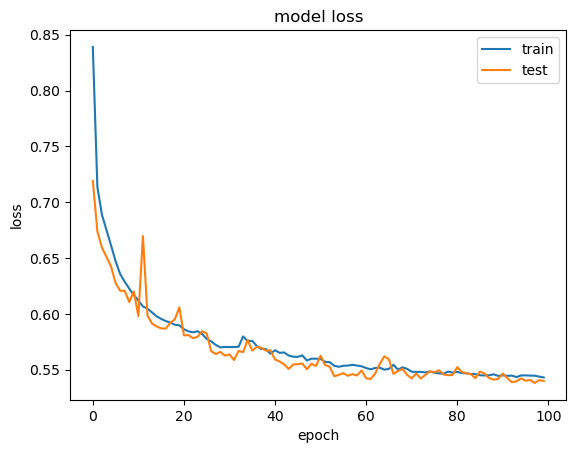

In [22]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

### Test

In [23]:
dae = load_model('fraudDAE.pth')

In [24]:
predictions = dae.predict(X_test_noise)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2671/2671 [==============================] - 6s 2ms/step


,reconstruction_error,true_class
count,85443.000000,85443.00000
mean,0.572554,0.00165
std,1.895738,0.04059
min,0.063791,0.00000
25%,0.231836,0.00000
50%,0.356777,0.00000
75%,0.610843,0.00000
max,112.928818,1.00000


In [25]:
threshold = 2.9

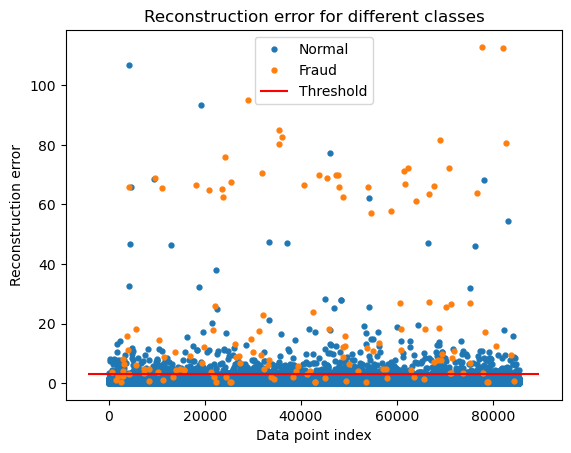

In [26]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

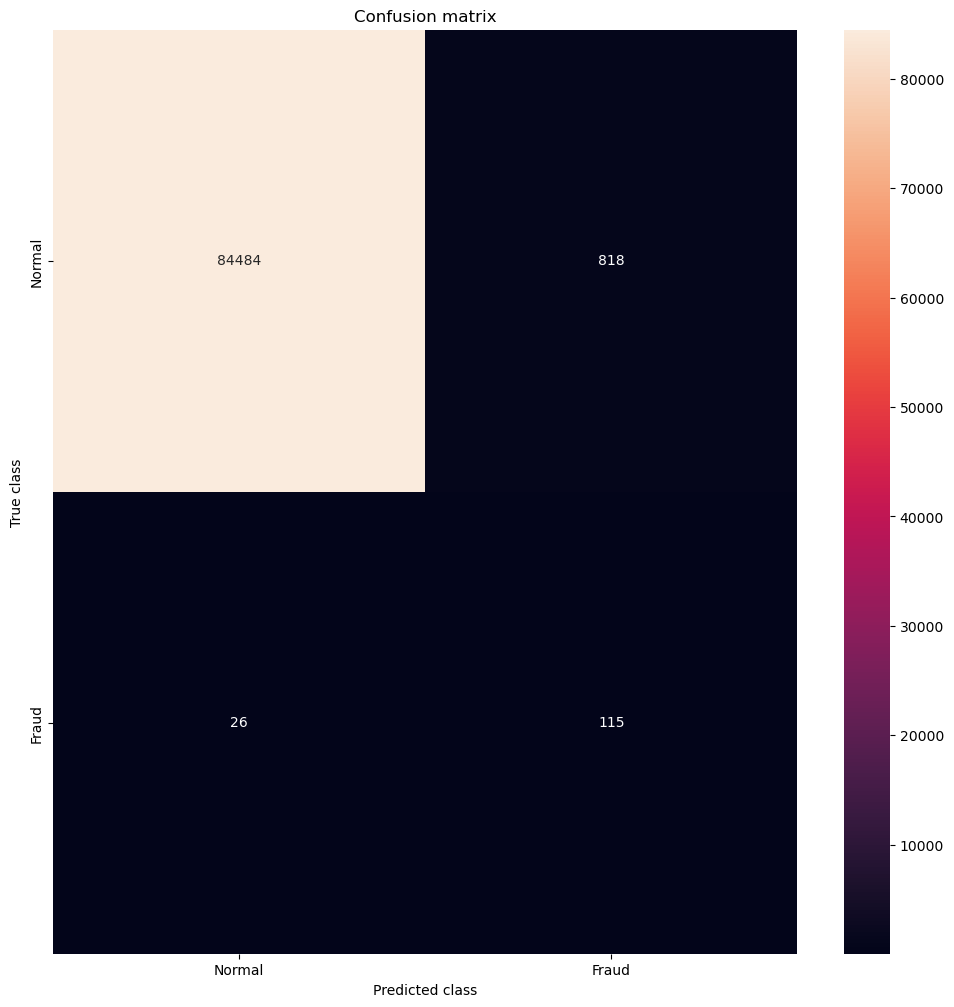

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
LABELS = ['Normal','Fraud']

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Visualize the latent space

In [28]:
inp_layer = dae.input
out_layer = dae.layers[3].output

encoder = Model(inputs=inp_layer, outputs=out_layer)

In [29]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense (Dense)               (None, 14)                406       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 2)                 16        
                                                                 
Total params: 527 (2.06 KB)
Trainable params: 527 (2.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2671/2671 [==============================] - 6s 2ms/step


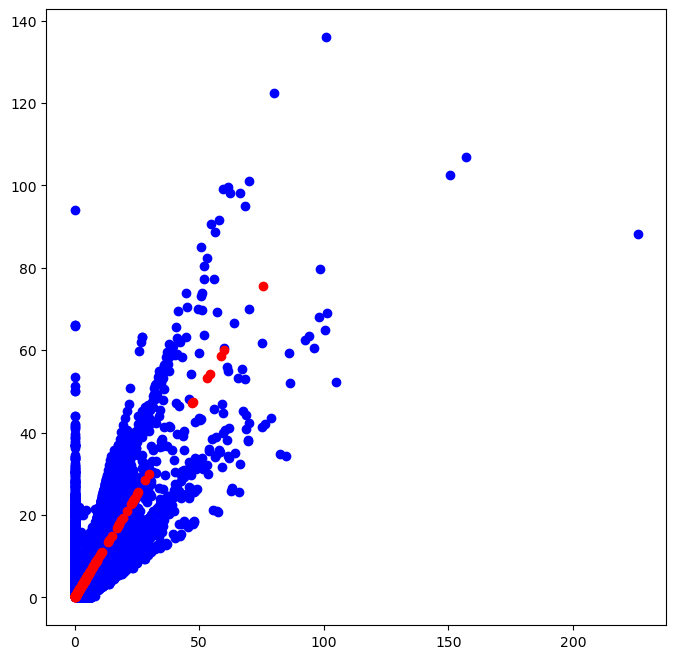

In [30]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

X_encoded = np.vstack((X_train_encoded, X_test_encoded))
y_main = np.hstack((np.zeros(len(X_train)), y_test))

encoded_df = pd.DataFrame(np.hstack((X_encoded, y_main[np.newaxis].transpose())))

plt.subplots(figsize=(8,8))
plt.scatter(encoded_df[encoded_df[2]==0][0],encoded_df[encoded_df[2]==0][1], color='blue', label='Normal')
plt.scatter(encoded_df[encoded_df[2]==1][1],encoded_df[encoded_df[2]==1][1], color='red', label='Fraud');